In [1]:
import numpy as np
import os
import utils
from extractDigitFeatures import extractDigitFeatures

In [2]:
data = utils.loadmat('../data/digits-normal.mat') 
features = extractDigitFeatures(data['x'], 'hog')
#model = trainModel(features[:, data['set']==trainSet], data['y'][data['set']==trainSet])
trainSet, testSet = 1, 2
param = {}
param['lambda'], param['maxiter'], param['eta'] = 0.01, 200,  .01
# trainModel : x = features[data['set']==trainSet, :], y = data['y'][data['set']==trainSet]
x_train = features[:, data['set']==trainSet]
y_train = data['y'][data['set']==trainSet]

x_val = features[:, data['set']==3]
y_val = data['y'][data['set']==3]

x_test = features[:, data['set']==testSet]
y_test = data['y'][data['set']==testSet]

# multiclassLRTrain : x, y, param
classLabels = np.unique(y_train)
numClass = classLabels.shape[0]
numFeats = x_train.shape[0]
numData = x_train.shape[1]

# Initialize weights randomly (Implement gradient descent)
#model = {}
#model['w'] = np.random.randn(numClass, numFeats)*0.01
#model['classLabels'] = classLabels

In [7]:
class LogisticRegression(object):
    def __init__(self, eta, lambda_, maxEpochs, numClass, debug=False, maxTol=10):
        self.lr = eta
        self.lambda_ = lambda_
        self.max_epochs = maxEpochs
        self.debug = debug
        self.numClass = numClass
        self.bias = np.random.uniform(low=-0.01, high=.01)
        self.maxTol = maxTol
        self.lastAccuracy = -1
        
    def softmax(self, X):
        exp = np.exp(X - np.max(X))
        return exp / np.array([np.sum(exp, axis=1)]).T
    
    def accuracy(self, X, y):
        y_pred = np.argmax(self.softmax(np.dot(X.T, self.weights)+self.bias), axis=1)
        self.y_pred = y_pred
        return np.sum([y_pred[i] == y[i] for i in range(y.size)]) / y.size
        
    def fit(self, X, y, X_val, y_val):
        self.weights = np.random.uniform(low=-0.01, high=.01, size=(X.shape[0], numClass))
        y_categorical = np.eye(self.numClass)[y] 
        curTol = 0
        
        for itr in range(self.max_epochs):
            prediction = self.softmax(np.dot(X.T, self.weights))
            error = y_categorical - prediction
            gradient = np.dot(X, error)
            self.weights += self.lr * (gradient - (self.lambda_ * self.weights ))
            self.bias -= self.lr * np.sum(error)
            
            
            curr_accuracy = self.accuracy(X_val, y_val)
            if curr_accuracy != self.lastAccuracy:
                self.lastAccuracy = curr_accuracy
            else:
                curTol += 1
                if curTol >= self.maxTol:
                    return self
            if itr % 50 == 0 and self.debug: 
                print ("Accuracy = {}".format(curr_accuracy))        
        return self
    
    def confusion_matrix(self, y):
        confusion_matrix = np.zeros((self.numClass, self.numClass))
        for itr in range(self.y_pred.size):
            confusion_matrix[y_test[itr], self.y_pred[itr]] += 1
        return confusion_matrix
    
    def predict(self, X, y):
        accuracy = self.accuracy(X, y)
        confusion_matrix = self.confusion_matrix(y)
        return accuracy, confusion_matrix
        

In [8]:
model = LogisticRegression(param['eta'], param['lambda'], param['maxiter'], numClass)
model = model.fit(x_train, y_train, x_val, y_val)
accuracy, confusion_mat = model.predict(x_test, y_test)
print (accuracy)

0.896


In [6]:
confusion_mat

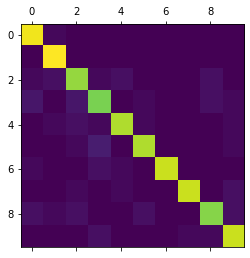

In [9]:
import matplotlib.pyplot as plt
plt.matshow(confusion_mat)